
# Assignment 2- MAT 5983 Neural Networks / AI

### Conor Wallace
### 09-30-2019

## (1.a) Research Interests
My area of research involves the detection and accomodation of performance anomalies from autonomous systems. The type of systems in question are known as Networked Control Systems (NCS) which falls under a subset of System of Systems (SoS) engineering. These systems have a particularly interesting effect on control engineering due to the inherent instability in actuation signals as a result of network communication variation. With typical network conditions time delay and packet loss is at a fairly minimal rate, roughly less than 10 ms and 1 percent respectively. This has little to no effect in the communication of actuation signals considering a control rate of 10 Hz (e.g. 1 actuation signal every 100 ms). However, if either rise above these typical measurements it can be catostrophic on control stability. Consider a packet loss of 10%, this means that every time step in the control algorithm the computed actuation signal is not realized at least once per second. This will cause the error in the system to exponentially increase and lead to dramatic instability. Fault diagnostics is inherently affected by network variation as well because the diagnosis is based on performance degredation, meaning that instability will resemble performance degredation. As part of my master's thesis, I use different machine learning techniques to classify between system faults and predict modified actuation signals so as to retain system stability.

<br>

## (1.b) Math and Engineering Background
I have a bachelor's degree in electrical engineering from the University of Texas at San Antonio as well as a minor in computer science. My math background includes but is not limited to:

    -Calculus 1,2
    -Engineering Analysis 1,2
    -Continuous/Discrete Signals and Systems
    -Discrete Time Control Systems
    -Networked Control Systems

    
The courses I am currently taking include:

    -Linear Control Systems
    -Engineering Optimization
    
<br>

## (1.c) Course Ambitions
In this course I hope to gain a deep understanding of the techniques I have and continue to implement in my research as well as to learn new techniques previously unaware to myself.

<br>

## (1.d) Final Project Topic
For my final project I would like to create a cascaded recurrent neural network comprised of a classifier style recurrent neural network to predict the current state of the system (e.g. ideal performance, fault detected, network anomaly, or fault detected and network anomaly) and a regression style recurrent neural network to predict the control states (x position, y position, z orientation) 10 time steps into the future. The data I will collect will be using a rover style unmanned ground vehicle with tracking capabilities and a rasberry pi computer onboard in communication with a desktop pc. The fault being analyzed is not determined at this time, but it should have an adverse affect on the maneuverability of the rover. The data will be of dimension $\mathbb{R}^{10}$ and will include x, y, z position, x, y, z orientation, linear and angular velocity, time delay, and packet loss percentage.

<br>

## (1.e) Potential Future Courses
I would be very much interested in a course entirely devoted to time series forcasting and regression modeling as it pertains directly to my research area. I have no particular desire for the time of day or day of the week.

<br>

(2) This will be open-ended and gradually build into more complicated assignments. In brief, take the Sonar Data Set and modify the perceptron code given in Chapters 2 of Raschka's book to classify the signals as "Mine" or "Rock". Some of the necessary modifications are straightforward - read in a different data set, but think about how this differs from Fischer Iris. How would you visualize the Sonar data? Would you expect to get similar accuracies? 

# (2.a) Sonar Data Visualization
The given data set is of dimension $\mathbb{R}^{60}$, meaning that gaining a visual understanding of the spread of data is much more difficult than that of the Fischer Iris data set. As a means of getting a rough estimate of the spread of data, I plot each sample as a function and assign a color according to its label. This can be seen in Figure 1. with no modifications to the data and as can be seen, there is essentially no separation in the data, only minor differences in the outer boundaries of the plot. 

#### Figure 1. Plot of Raw Data Set
<img src="data_plot.png">

Before training the perceptron on the data, it must be normalized between 0 and 1, so it is good to plot the normalized data to see if this changes anything. This can be seen in Figure 2. and just as before, there is no meaningful separation between the two classes.

#### Figure 2. Plot of Standardized Data Set
<img src="std_data_plot.png">

In a final attempt to visualize a separation between the two classes, we can compute statistics on each sample and plot these to see if there is a deeper separation. The statistics computed included mean, standard deviation, kurtosis, and skewness. As can be seen in Figure 3. this did not help either. In conclusion, the data set given does not have any meaningful separation which makes generating successful prediction accuracies difficult.

#### Figure 3. Statistics of Data
<img src="stats_data.png">

# (2.b) Perceptron Training and Validation
In addition to normalizing the data, I shuffled the data set so as to prevent overfitting. This wasn't done at first and thus resulted in perfect training accuracies, but horrible validation accuracies (e.g. ~30-40%). The training period is set to 2000 epochs, but I have a check to stop training when the training accuracy and validation accuracy are within 5 percent of each other and have recieved an average accuracy of 90%. Due to the long training period I have slightly lowered the learning rate to 0.001 so as not to overstep any possible local minima. As a result I achieved a training and validation accuracy of 96% and 92% respectively in 1303 epochs.

#### Figure 4. Training and Validation Results
<img src="results.png">

<br><br>


# Import Package Dependencies

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

2.2.4


# Data Visualization

In [2]:
df = pd.read_csv("sonar.all-data", header=None)
label = df.iloc[:, -1:].values
label = np.where(label == 'M', -1, 1)

data = df.iloc[:, :-1].values

color = 'r'
print(np.shape(label)[0])
print(np.shape(data)[0])
for i in range(np.shape(data)[0]):
    if label[i] == 1:
        color = 'b'
    else:
        color = 'r'
    plt.plot(range(len(data[i,:])), data[i, :], color=color)

plt.xlabel('Features')
plt.ylabel('Measurement')
plt.title('Data')
plt.show()

208
208


In [3]:
mean = []
std = []
kurt = []
skewness = []

for i in range(np.shape(data)[0]):
    mean.append(scipy.mean(data[i, :]))
    std.append(scipy.std(data[i, :]))
    kurt.append(kurtosis(data[i, :]))
    skewness.append(skew(data[i, :]))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 8))

color = 'r'

for i in range(len(mean)):
    if label[i] == 1:
        color = 'b'
    else:
        color = 'r'
    ax1.scatter(mean[i], std[i], color=color)

for i in range(len(mean)):
    if label[i] == 1:
        color = 'b'
    else:
        color = 'r'
    ax2.scatter(mean[i], kurt[i], color=color)

for i in range(len(mean)):
    if label[i] == 1:
        color = 'b'
    else:
        color = 'r'
    ax3.scatter(mean[i], skewness[i], color=color)

ax1.set(xlabel='mean', ylabel='std', title='Mean vs. Std')
ax2.set(xlabel='mean', ylabel='kurt', title='Mean vs. Kurtosis')
ax3.set(xlabel='mean', ylabel='skew', title='Mean vs. Skewness')

[Text(0,0.5,'skew'), Text(0.5,0,'mean'), Text(0.5,1,'Mean vs. Skewness')]

# Data Preprocessing

In [4]:
#Extract Features and Labels
data = MinMaxScaler().fit_transform(data)

test_data = []
test_label = []
train_data = data
train_label = np.reshape(label, [len(label), 1])
# Creates a training set with an equal amount of each type (25% of total data)
count_M = len(label)*.125
count_R = len(label)*.125
count = 0
while count_M != 0 or count_R != 0:
    if label[count] == 1 and count_R != 0:
        test_data.append(data[count])
        test_label.append(label[count])
        train_data = np.delete(train_data, count, 0)
        train_label = np.delete(train_label, count, 0)
        count_R -= 1
    if label[count] == -1 and count_M != 0:
        test_data.append(data[count])
        test_label.append(label[count])
        train_data = np.delete(train_data, count, 0)
        train_label = np.delete(train_label, count, 0)
        count_M -= 1
    count += 1
    
test_data = np.asarray(test_data)
test_label = np.asarray(test_label)
print(np.shape(test_data))
print(np.shape(test_label))
print(np.shape(train_data))
print(np.shape(train_label))

(52, 60)
(52, 1)
(156, 60)
(156, 1)


# Modified Perceptron Model

In [5]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.accuracy = 0.0
        self.test_accuracy = 0.0
        self.train_accuracies = []
        self.test_accuracies = []
        self.last_score = 0.0
        self.last_five = []
        self.last_five_scores = 100.0

    def fit(self, X, y, test_X, test_y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            accuracy = 0.0
            test_accuracy = 0.0
            #train
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.predict(xi) == target:
                    accuracy += 1.0
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.accuracy = accuracy/len(y)
            self.train_accuracies.append(self.accuracy)
            
            #test
            for test_xi, test_target in zip(test_X, test_y):
                if self.predict(test_xi) == test_target:
                    test_accuracy += 1.0
            self.test_accuracy = test_accuracy/len(test_y)
            self.test_accuracies.append(self.test_accuracy)
            
            print("epoch: %s train accuracy: %s validation accuracy: %s" % (_, self.accuracy, self.test_accuracy))
            #print(self.eta)
            if (self.accuracy - self.test_accuracy < 0.05) and ((self.accuracy + self.test_accuracy)/2.0 > 0.92):
                print(self.accuracy - self.test_accuracy)
                print((self.accuracy + self.test_accuracy)/2.0)
                return self
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Train and Test Perceptron Model

epoch: 0 train accuracy: 0.961538461538 validation accuracy: 0.519230769231
epoch: 1 train accuracy: 0.961538461538 validation accuracy: 0.519230769231
epoch: 2 train accuracy: 0.955128205128 validation accuracy: 0.5
epoch: 3 train accuracy: 0.948717948718 validation accuracy: 0.5
epoch: 4 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 5 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 6 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 7 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 8 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 9 train accuracy: 0.948717948718 validation accuracy: 0.5
epoch: 10 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 11 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 12 train accuracy: 0.961538461538 validation accuracy: 0.5
epoch: 13 train accuracy: 0.948717948718 validation accuracy: 0.5
epoch: 14 train accuracy: 0.948717948718 validation accuracy: 0.

epoch: 119 train accuracy: 0.923076923077 validation accuracy: 0.519230769231
epoch: 120 train accuracy: 0.929487179487 validation accuracy: 0.557692307692
epoch: 121 train accuracy: 0.935897435897 validation accuracy: 0.557692307692
epoch: 122 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 123 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 124 train accuracy: 0.923076923077 validation accuracy: 0.538461538462
epoch: 125 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 126 train accuracy: 0.923076923077 validation accuracy: 0.519230769231
epoch: 127 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 128 train accuracy: 0.916666666667 validation accuracy: 0.5
epoch: 129 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 130 train accuracy: 0.929487179487 validation accuracy: 0.538461538462
epoch: 131 train accuracy: 0.923076923077 validation accuracy: 0.5
epoch: 132 train accuracy: 0.923076923077 validation accuracy: 

epoch: 261 train accuracy: 0.942307692308 validation accuracy: 0.596153846154
epoch: 262 train accuracy: 0.942307692308 validation accuracy: 0.673076923077
epoch: 263 train accuracy: 0.948717948718 validation accuracy: 0.673076923077
epoch: 264 train accuracy: 0.948717948718 validation accuracy: 0.653846153846
epoch: 265 train accuracy: 0.935897435897 validation accuracy: 0.615384615385
epoch: 266 train accuracy: 0.935897435897 validation accuracy: 0.634615384615
epoch: 267 train accuracy: 0.942307692308 validation accuracy: 0.596153846154
epoch: 268 train accuracy: 0.942307692308 validation accuracy: 0.653846153846
epoch: 269 train accuracy: 0.929487179487 validation accuracy: 0.576923076923
epoch: 270 train accuracy: 0.935897435897 validation accuracy: 0.538461538462
epoch: 271 train accuracy: 0.935897435897 validation accuracy: 0.596153846154
epoch: 272 train accuracy: 0.935897435897 validation accuracy: 0.557692307692
epoch: 273 train accuracy: 0.942307692308 validation accuracy: 0

epoch: 407 train accuracy: 0.942307692308 validation accuracy: 0.692307692308
epoch: 408 train accuracy: 0.942307692308 validation accuracy: 0.634615384615
epoch: 409 train accuracy: 0.942307692308 validation accuracy: 0.711538461538
epoch: 410 train accuracy: 0.948717948718 validation accuracy: 0.692307692308
epoch: 411 train accuracy: 0.935897435897 validation accuracy: 0.653846153846
epoch: 412 train accuracy: 0.935897435897 validation accuracy: 0.653846153846
epoch: 413 train accuracy: 0.935897435897 validation accuracy: 0.634615384615
epoch: 414 train accuracy: 0.935897435897 validation accuracy: 0.615384615385
epoch: 415 train accuracy: 0.942307692308 validation accuracy: 0.692307692308
epoch: 416 train accuracy: 0.948717948718 validation accuracy: 0.673076923077
epoch: 417 train accuracy: 0.929487179487 validation accuracy: 0.596153846154
epoch: 418 train accuracy: 0.929487179487 validation accuracy: 0.653846153846
epoch: 419 train accuracy: 0.935897435897 validation accuracy: 0

epoch: 546 train accuracy: 0.942307692308 validation accuracy: 0.634615384615
epoch: 547 train accuracy: 0.935897435897 validation accuracy: 0.634615384615
epoch: 548 train accuracy: 0.935897435897 validation accuracy: 0.653846153846
epoch: 549 train accuracy: 0.942307692308 validation accuracy: 0.673076923077
epoch: 550 train accuracy: 0.948717948718 validation accuracy: 0.692307692308
epoch: 551 train accuracy: 0.948717948718 validation accuracy: 0.653846153846
epoch: 552 train accuracy: 0.935897435897 validation accuracy: 0.615384615385
epoch: 553 train accuracy: 0.955128205128 validation accuracy: 0.711538461538
epoch: 554 train accuracy: 0.942307692308 validation accuracy: 0.673076923077
epoch: 555 train accuracy: 0.942307692308 validation accuracy: 0.711538461538
epoch: 556 train accuracy: 0.948717948718 validation accuracy: 0.692307692308
epoch: 557 train accuracy: 0.942307692308 validation accuracy: 0.634615384615
epoch: 558 train accuracy: 0.935897435897 validation accuracy: 0

epoch: 680 train accuracy: 0.948717948718 validation accuracy: 0.730769230769
epoch: 681 train accuracy: 0.948717948718 validation accuracy: 0.673076923077
epoch: 682 train accuracy: 0.955128205128 validation accuracy: 0.75
epoch: 683 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 684 train accuracy: 0.948717948718 validation accuracy: 0.711538461538
epoch: 685 train accuracy: 0.961538461538 validation accuracy: 0.711538461538
epoch: 686 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 687 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 688 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 689 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 690 train accuracy: 0.942307692308 validation accuracy: 0.634615384615
epoch: 691 train accuracy: 0.948717948718 validation accuracy: 0.634615384615
epoch: 692 train accuracy: 0.935897435897 validation accuracy: 0.653846153846
epoch: 693 train accuracy: 0.955128205128 vali

epoch: 821 train accuracy: 0.948717948718 validation accuracy: 0.807692307692
epoch: 822 train accuracy: 0.955128205128 validation accuracy: 0.653846153846
epoch: 823 train accuracy: 0.942307692308 validation accuracy: 0.692307692308
epoch: 824 train accuracy: 0.948717948718 validation accuracy: 0.807692307692
epoch: 825 train accuracy: 0.955128205128 validation accuracy: 0.769230769231
epoch: 826 train accuracy: 0.948717948718 validation accuracy: 0.730769230769
epoch: 827 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 828 train accuracy: 0.948717948718 validation accuracy: 0.711538461538
epoch: 829 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 830 train accuracy: 0.948717948718 validation accuracy: 0.769230769231
epoch: 831 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 832 train accuracy: 0.948717948718 validation accuracy: 0.769230769231
epoch: 833 train accuracy: 0.948717948718 validation accuracy: 0.653846153846
epoch: 834 train

epoch: 956 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 957 train accuracy: 0.948717948718 validation accuracy: 0.653846153846
epoch: 958 train accuracy: 0.942307692308 validation accuracy: 0.769230769231
epoch: 959 train accuracy: 0.961538461538 validation accuracy: 0.807692307692
epoch: 960 train accuracy: 0.955128205128 validation accuracy: 0.826923076923
epoch: 961 train accuracy: 0.961538461538 validation accuracy: 0.807692307692
epoch: 962 train accuracy: 0.955128205128 validation accuracy: 0.673076923077
epoch: 963 train accuracy: 0.948717948718 validation accuracy: 0.692307692308
epoch: 964 train accuracy: 0.948717948718 validation accuracy: 0.673076923077
epoch: 965 train accuracy: 0.948717948718 validation accuracy: 0.730769230769
epoch: 966 train accuracy: 0.948717948718 validation accuracy: 0.673076923077
epoch: 967 train accuracy: 0.955128205128 validation accuracy: 0.788461538462
epoch: 968 train accuracy: 0.961538461538 validation accuracy: 0.807692307

epoch: 1081 train accuracy: 0.961538461538 validation accuracy: 0.865384615385
epoch: 1082 train accuracy: 0.961538461538 validation accuracy: 0.826923076923
epoch: 1083 train accuracy: 0.961538461538 validation accuracy: 0.807692307692
epoch: 1084 train accuracy: 0.948717948718 validation accuracy: 0.653846153846
epoch: 1085 train accuracy: 0.948717948718 validation accuracy: 0.75
epoch: 1086 train accuracy: 0.961538461538 validation accuracy: 0.692307692308
epoch: 1087 train accuracy: 0.948717948718 validation accuracy: 0.769230769231
epoch: 1088 train accuracy: 0.967948717949 validation accuracy: 0.865384615385
epoch: 1089 train accuracy: 0.961538461538 validation accuracy: 0.807692307692
epoch: 1090 train accuracy: 0.955128205128 validation accuracy: 0.673076923077
epoch: 1091 train accuracy: 0.955128205128 validation accuracy: 0.865384615385
epoch: 1092 train accuracy: 0.974358974359 validation accuracy: 0.884615384615
epoch: 1093 train accuracy: 0.961538461538 validation accuracy

epoch: 1206 train accuracy: 0.955128205128 validation accuracy: 0.711538461538
epoch: 1207 train accuracy: 0.967948717949 validation accuracy: 0.846153846154
epoch: 1208 train accuracy: 0.974358974359 validation accuracy: 0.903846153846
epoch: 1209 train accuracy: 0.967948717949 validation accuracy: 0.711538461538
epoch: 1210 train accuracy: 0.967948717949 validation accuracy: 0.788461538462
epoch: 1211 train accuracy: 0.961538461538 validation accuracy: 0.846153846154
epoch: 1212 train accuracy: 0.974358974359 validation accuracy: 0.884615384615
epoch: 1213 train accuracy: 0.974358974359 validation accuracy: 0.884615384615
epoch: 1214 train accuracy: 0.967948717949 validation accuracy: 0.692307692308
epoch: 1215 train accuracy: 0.967948717949 validation accuracy: 0.865384615385
epoch: 1216 train accuracy: 0.961538461538 validation accuracy: 0.865384615385
epoch: 1217 train accuracy: 0.974358974359 validation accuracy: 0.884615384615
epoch: 1218 train accuracy: 0.974358974359 validatio

[Text(0,0.5,'Accuracy'),
 Text(0.5,0,'Epochs'),
 Text(0.5,1,'Validation Accuracy')]

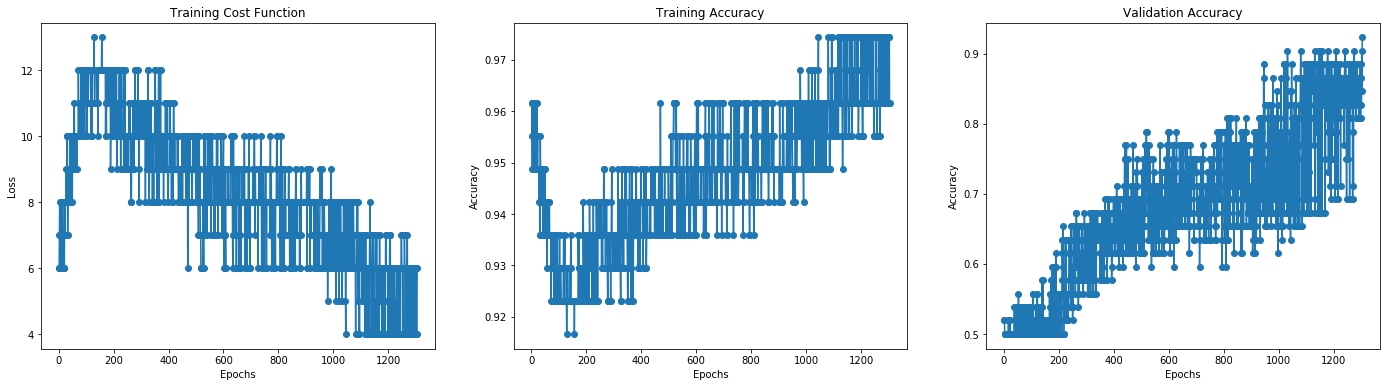

In [6]:
ppn = Perceptron(eta=0.001, n_iter=2000)

ppn.fit(train_data, train_label, test_data, test_label)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 6))

ax1.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax2.plot(range(1, len(ppn.train_accuracies) + 1), ppn.train_accuracies, marker='o')
ax3.plot(range(1, len(ppn.test_accuracies) + 1), ppn.test_accuracies, marker='o')

ax1.set(xlabel='Epochs', ylabel='Loss', title='Training Cost Function')
ax2.set(xlabel='Epochs', ylabel='Accuracy', title='Training Accuracy')
ax3.set(xlabel='Epochs', ylabel='Accuracy', title='Validation Accuracy')